___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.11.5


In [4]:
# pip install tensorflow

In [5]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [6]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [7]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df = pd.read_csv("1-Churn_Modelling.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [11]:
df.shape

(10000, 14)

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum().any()

False

In [15]:
df.duplicated().sum().any()

False

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [17]:
df.describe(include="O").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [18]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1,inplace = True)

In [19]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [20]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [21]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

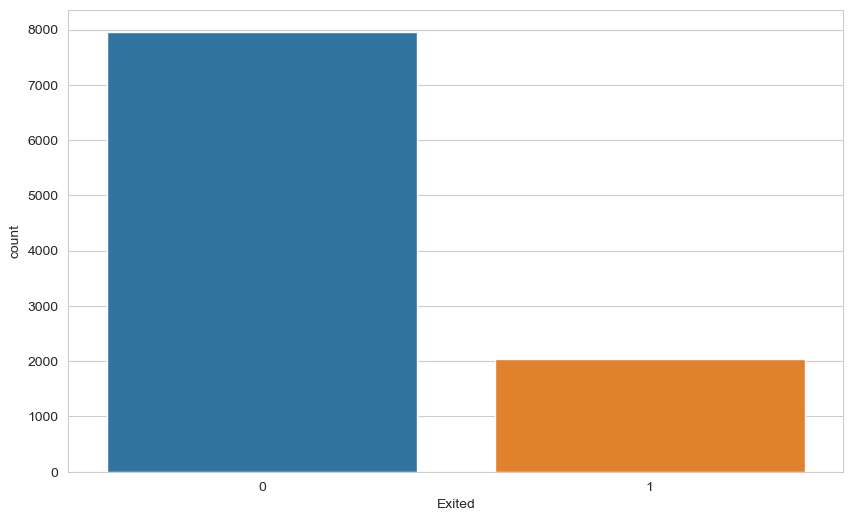

In [22]:
sns.countplot(x=df["Exited"])

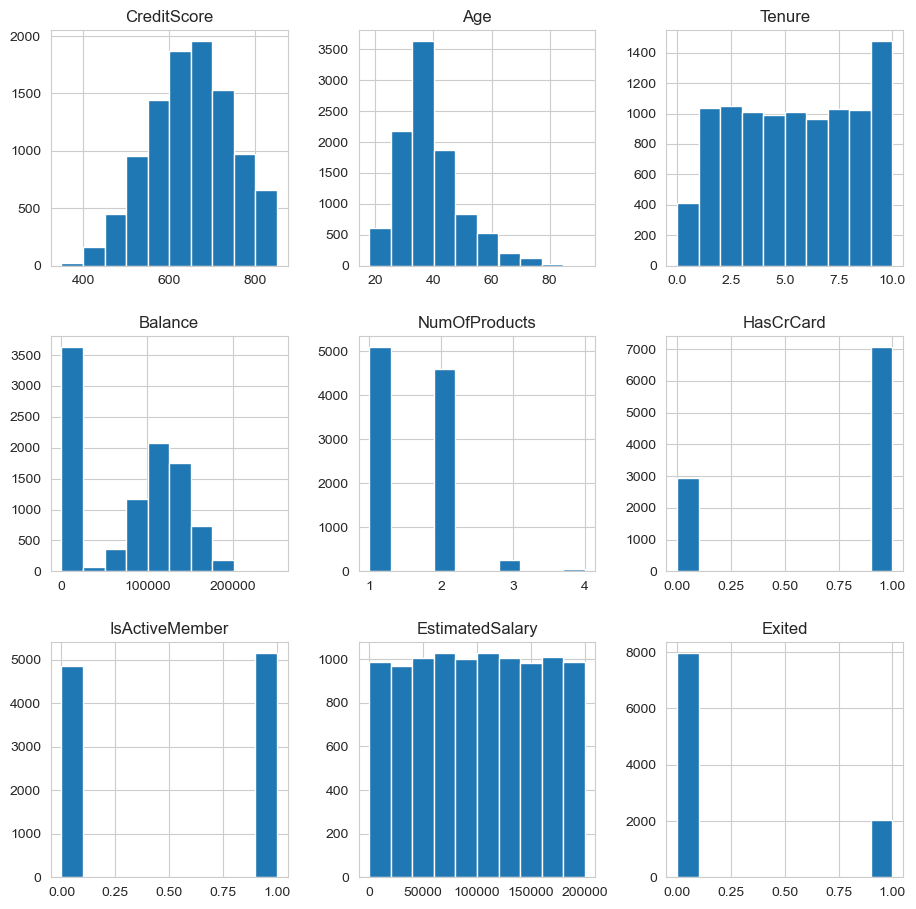

In [23]:
df.hist(figsize=(11,11))

plt.show()

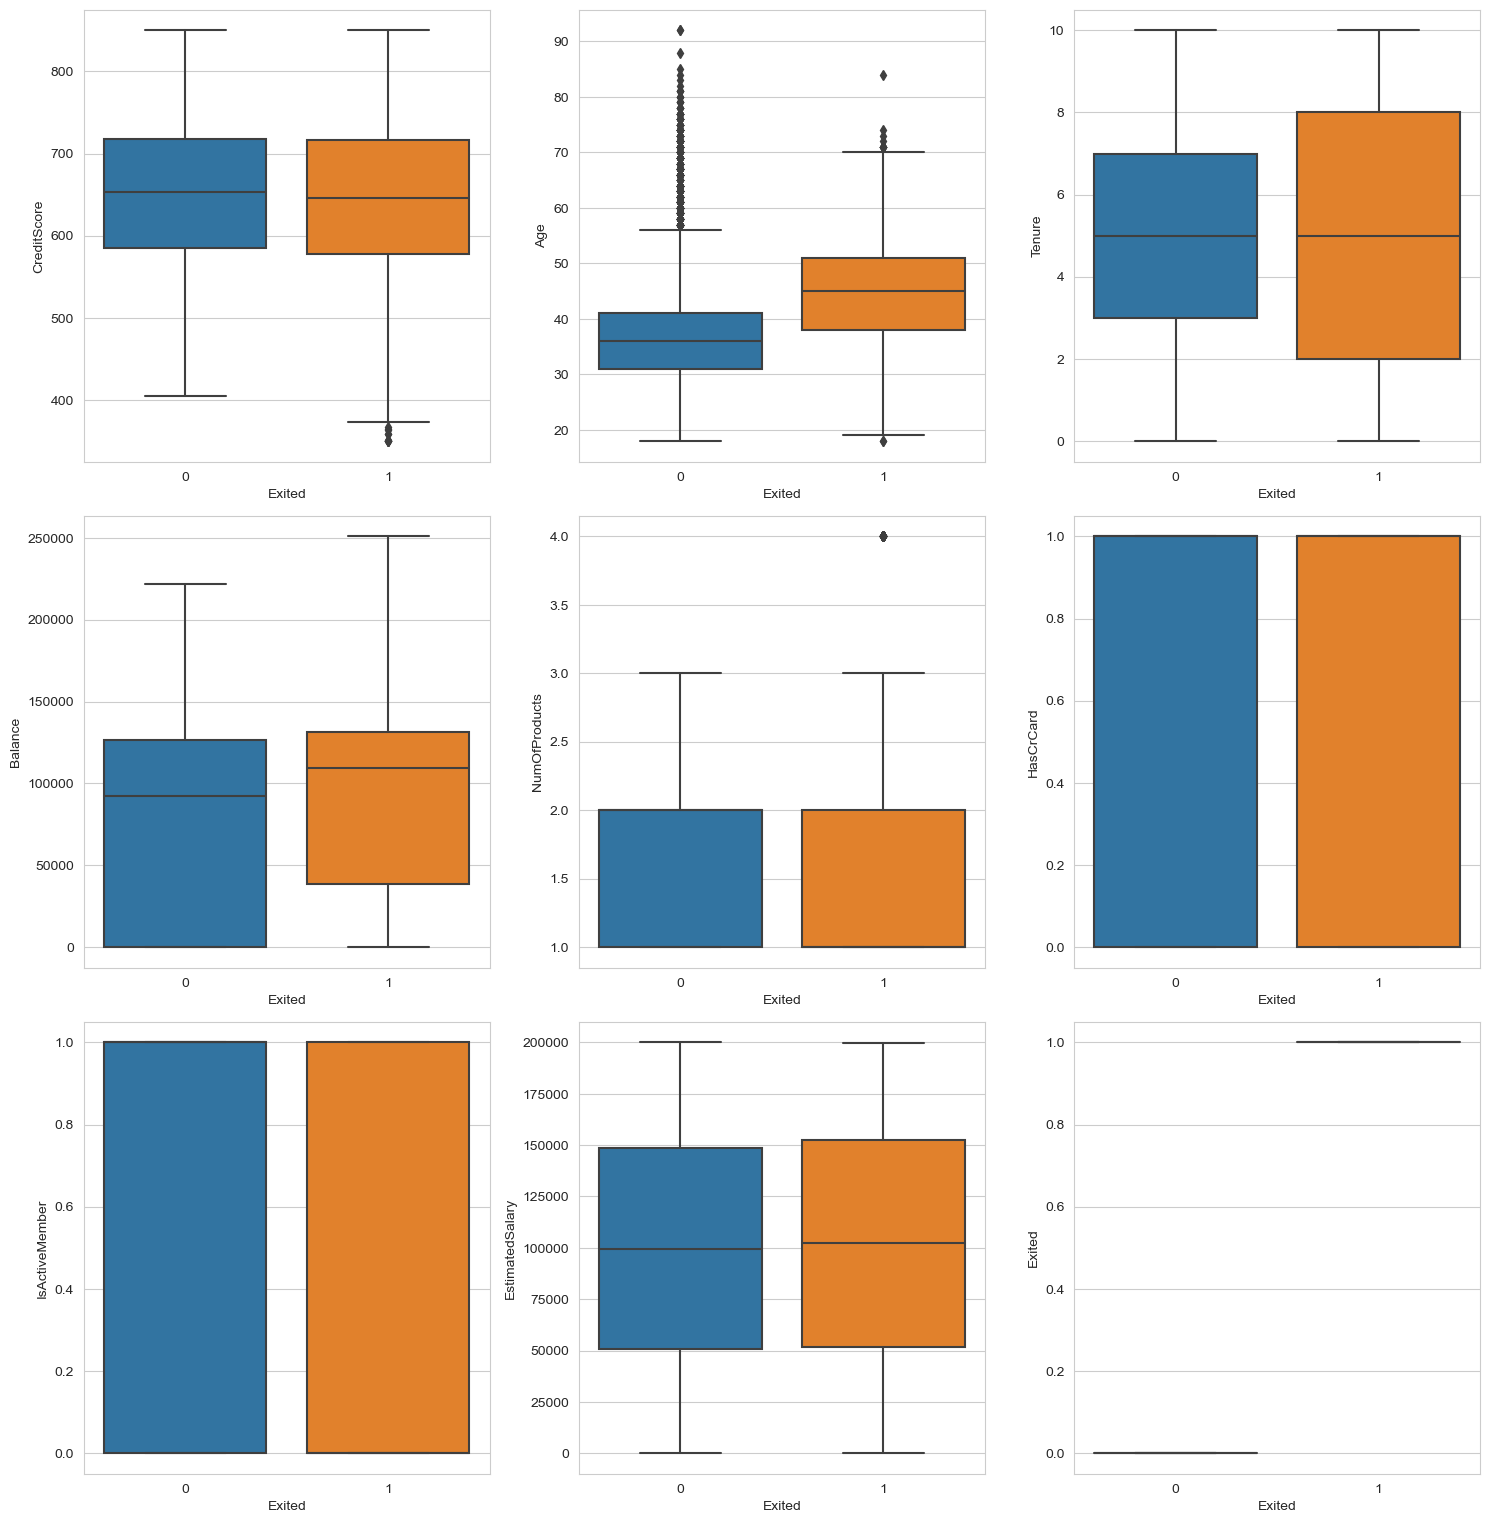

In [24]:
# Here we could see the most distinguishing features and potential outliers

fig = plt.figure(figsize=(15,20))

for i, col in enumerate(df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=df[col], data=df)

plt.tight_layout();

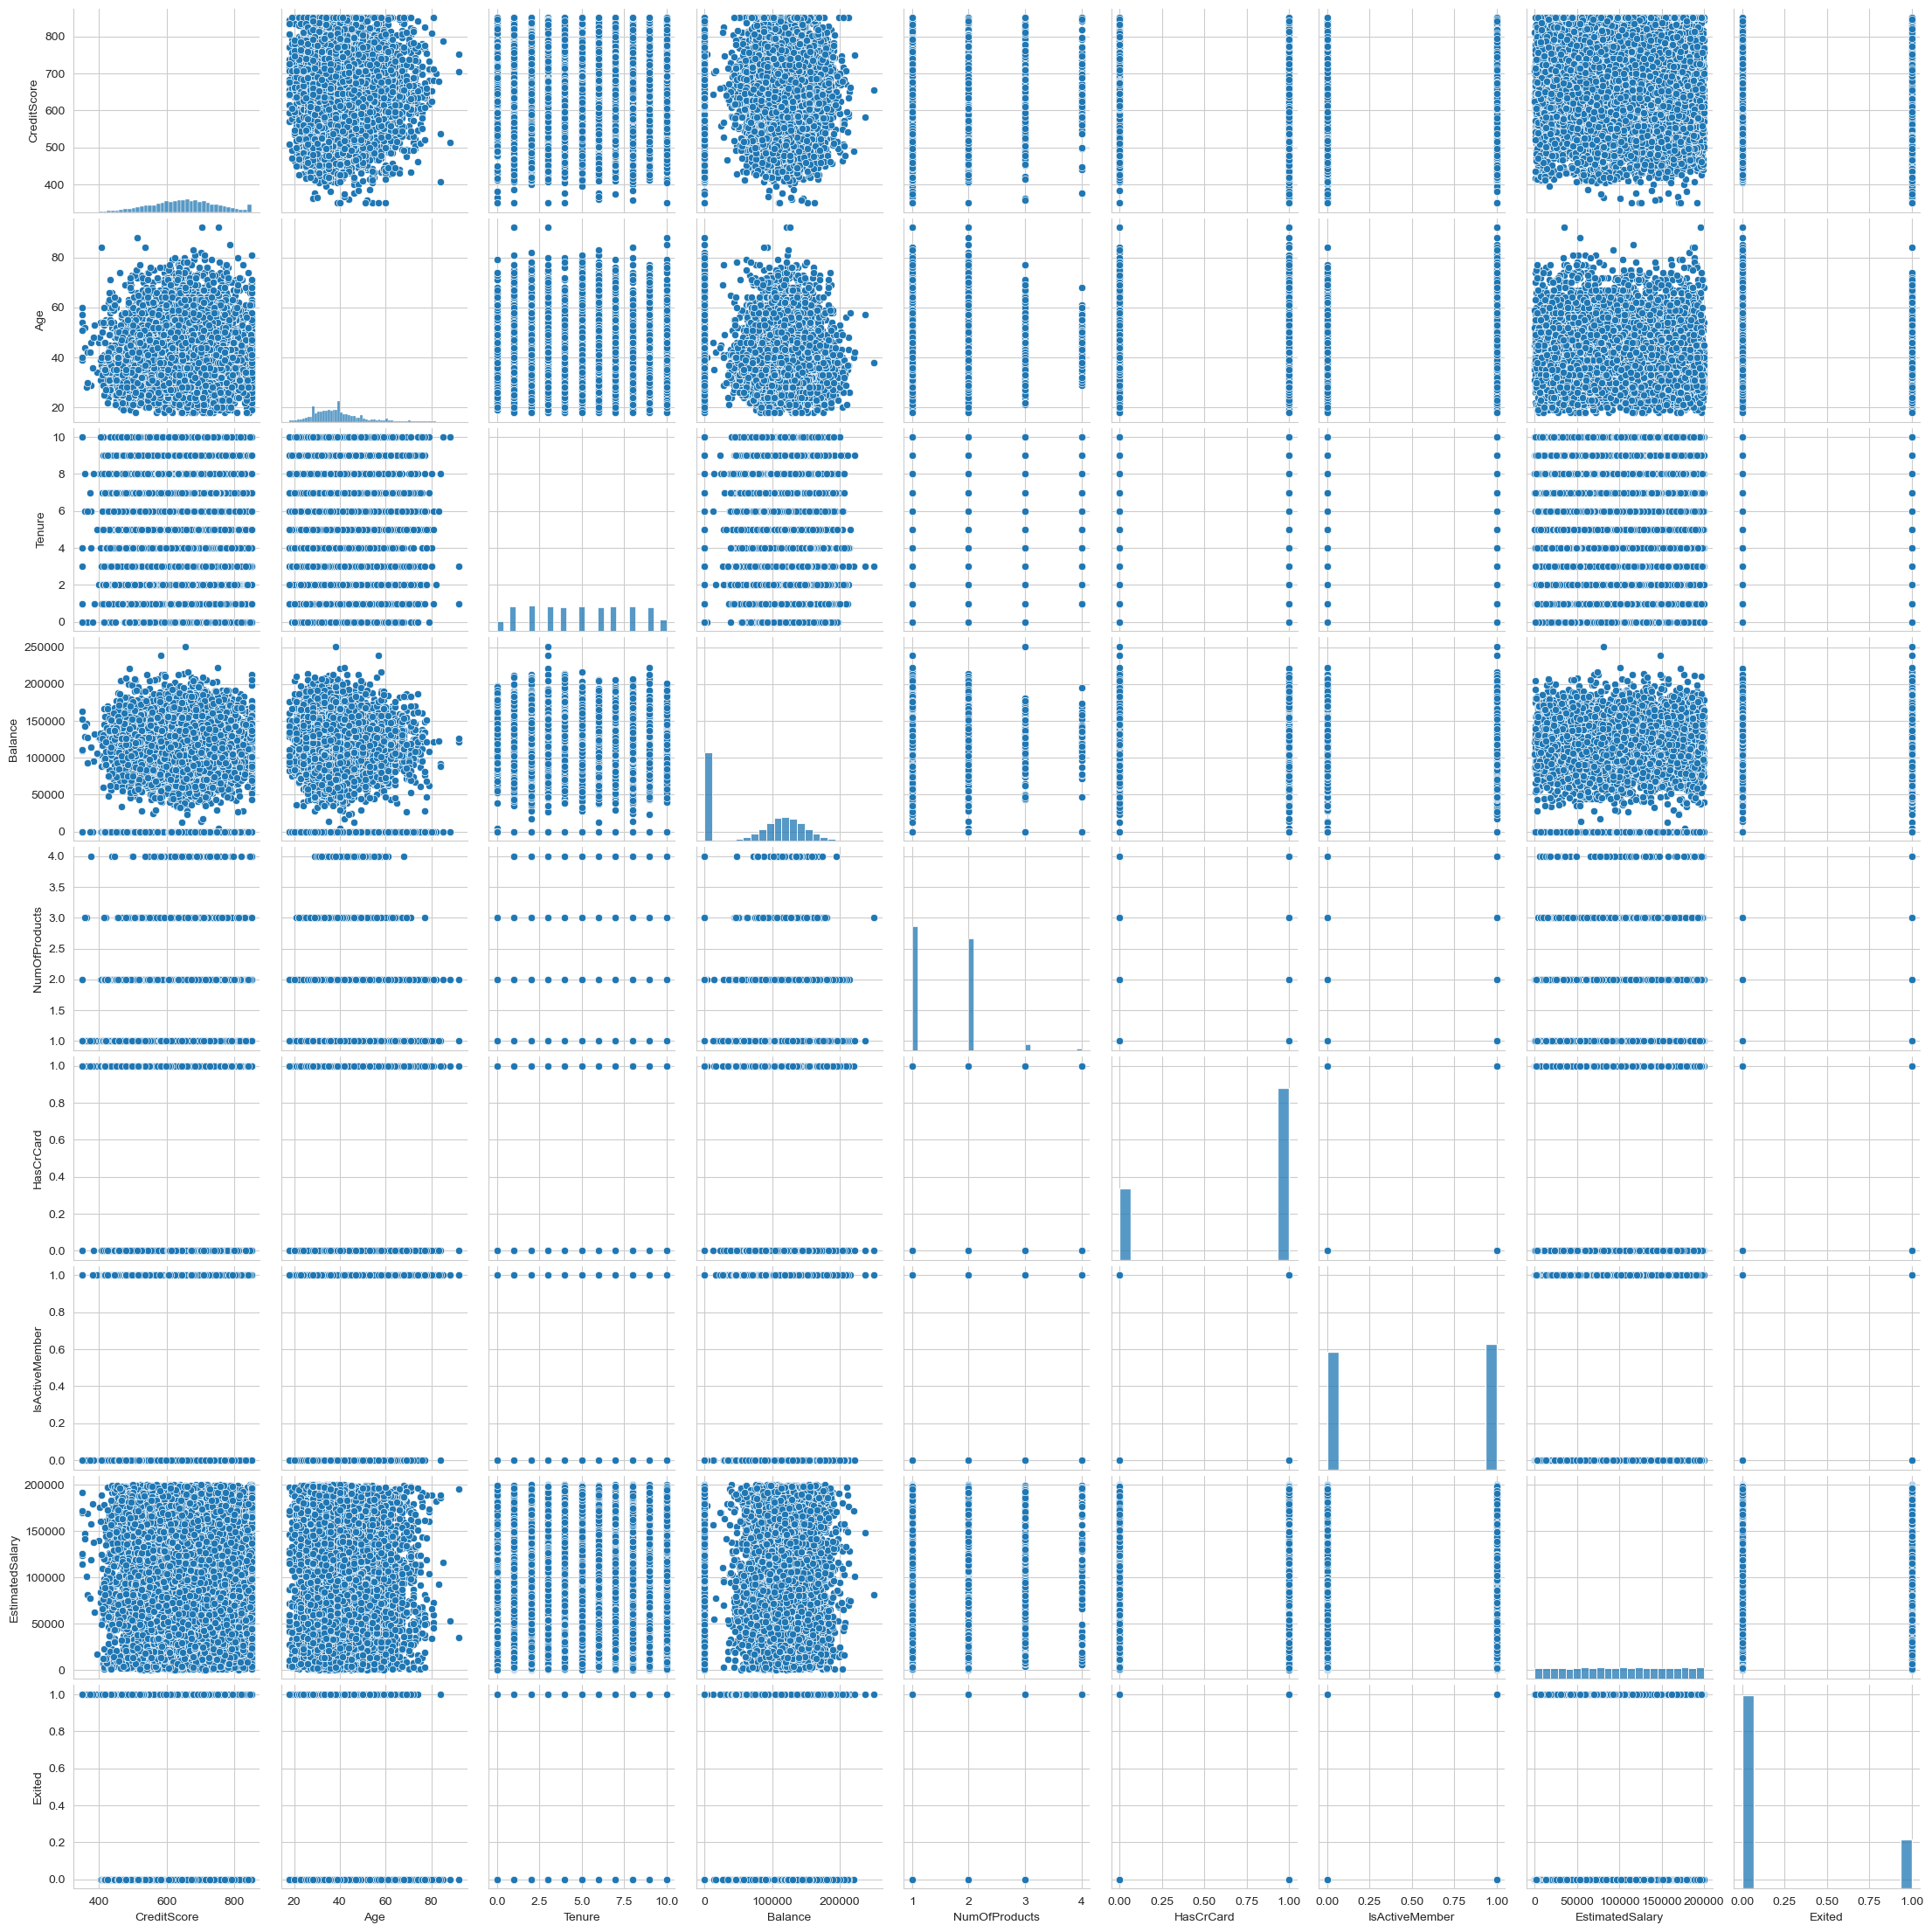

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
# df.corr()

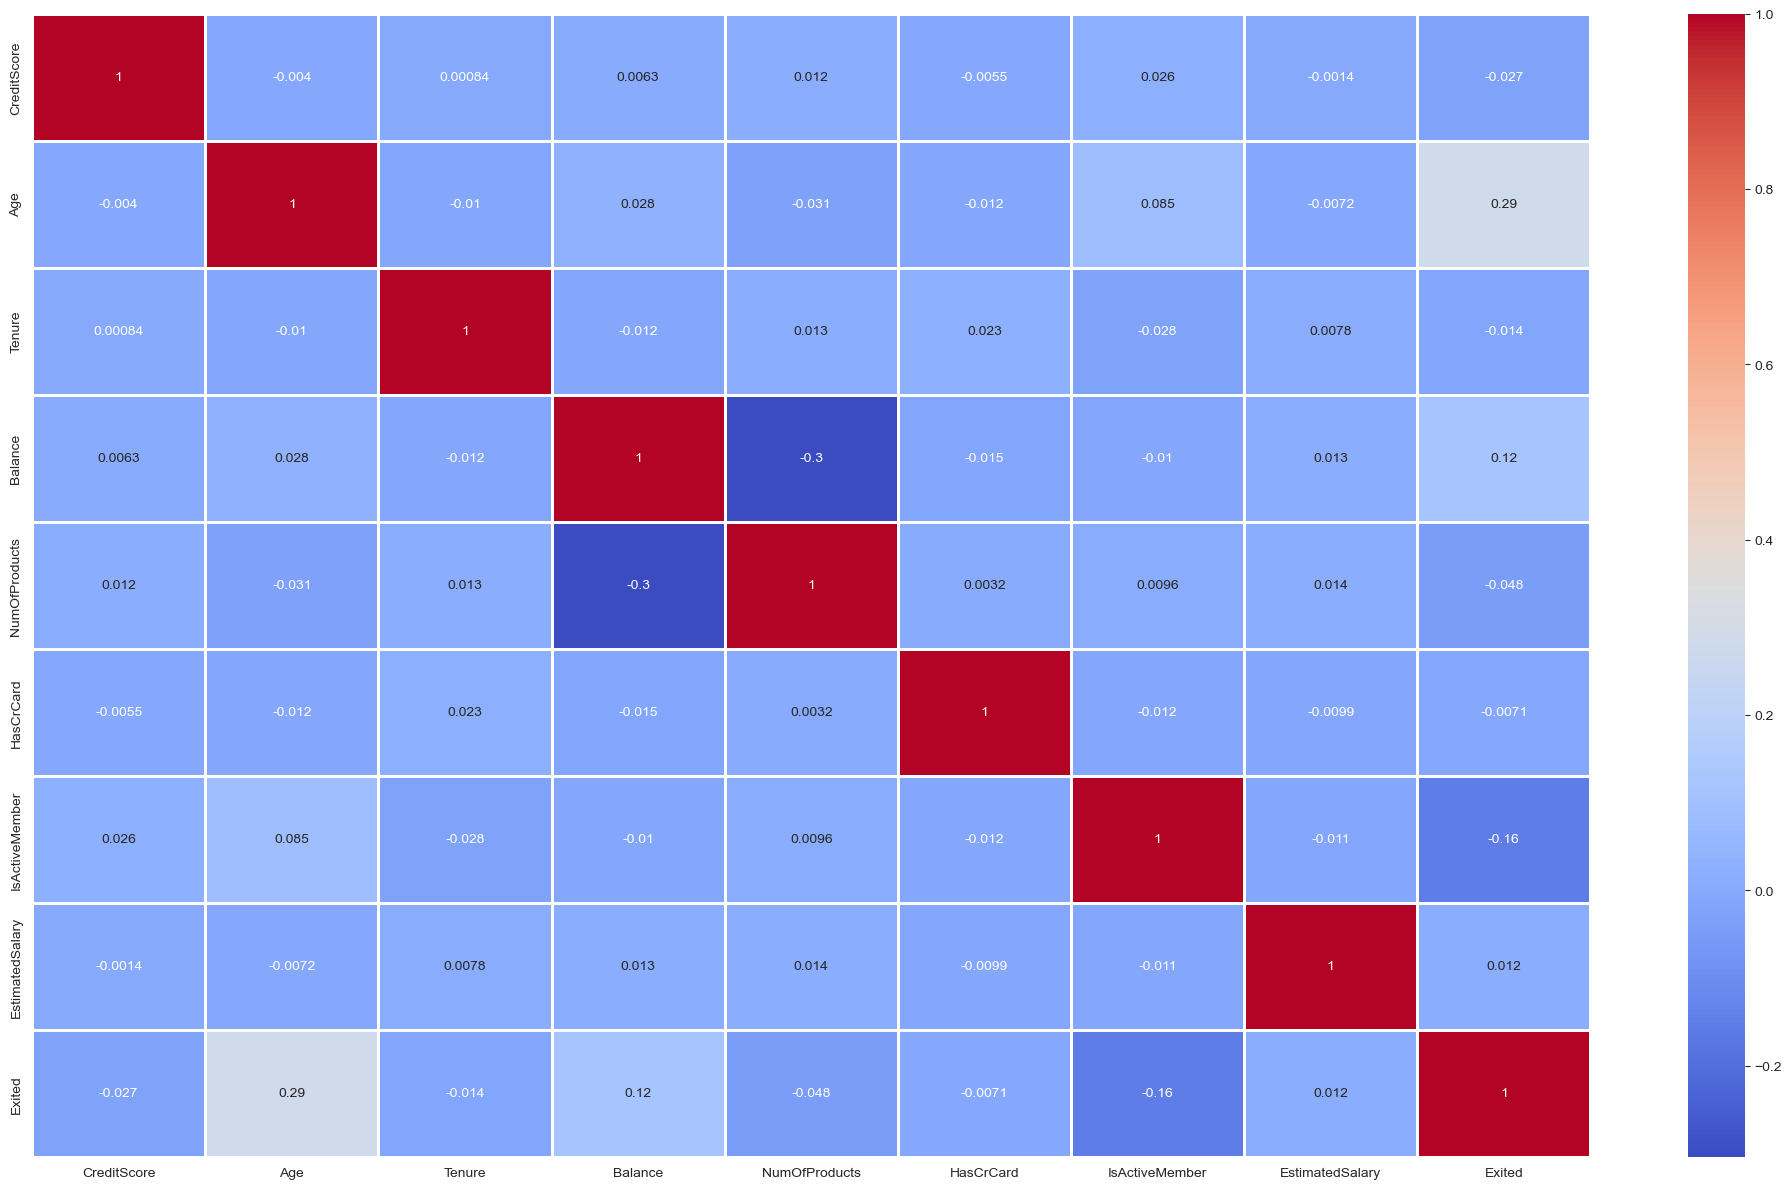

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidth =2 , cmap="coolwarm")
plt.tight_layout()

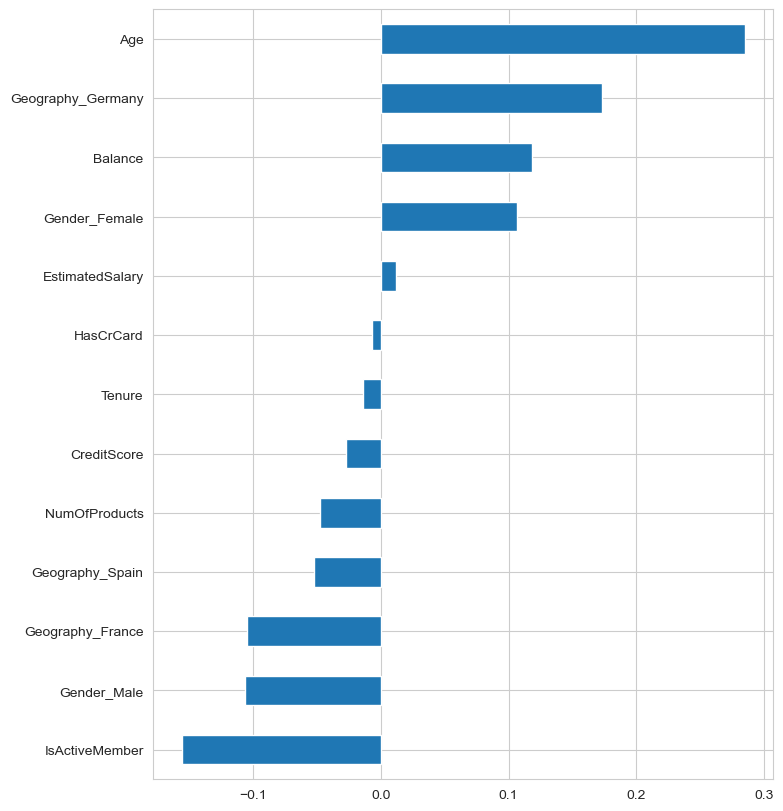

In [145]:
plt.figure(figsize=(8, 10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
columns_to_encode = ['Geography', 'Gender']

In [30]:
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

In [31]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [32]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [33]:
df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

In [34]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000,1.000,0.000
1,608,41,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000,1.000,0.000
2,502,42,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000,1.000,0.000
3,699,39,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000,1.000,0.000
4,850,43,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000,1.000,0.000


In [35]:
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (8000, 13)
X_test Shape:  (2000, 13)
y_train Shape:  (8000,)
y_test Shape:  (2000,)


In [39]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [40]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_val.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_val.shape)

X_train Shape:  (7200, 13)
X_test Shape:  (800, 13)
y_train Shape:  (7200,)
y_test Shape:  (800,)


In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_val_scale = sc.transform(X_val)
X_test_scale = sc.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [43]:
# First way to create the model using the Sequential API
tf.random.set_seed(42)

# # intialising the ANN
model = Sequential(
    [
        Input(shape=X_train_scale.shape[1]), # Adding the Input Layer
        Dense(units=6, activation="relu"), # Adding the First Hidden Layer
        Dense(units=6, activation="relu"), # Adding the Second Hidden Layer
#         Dense(units=6, activation="relu"),
        Dense(units=1, activation='sigmoid'), # Adding the Output Layer
    ]
)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 6) dtype=float32, numpy=
 array([[-0.4936576 , -0.30587196, -0.04516494,  0.2382701 , -0.09013429,
          0.37322044],
        [ 0.04697609, -0.44488698,  0.08894843,  0.20426351,  0.3714841 ,
          0.12261391],
        [ 0.26257485, -0.31607747, -0.29448342,  0.38781232, -0.33620805,
         -0.52928036],
        [-0.55654013, -0.05858141,  0.19868004,  0.37324834,  0.07500005,
         -0.03638941],
        [-0.36061513,  0.4549219 ,  0.05144447,  0.09097248, -0.33679393,
         -0.15103018],
        [-0.2179963 , -0.3476696 ,  0.38138813,  0.31915098, -0.27963793,
          0.12192661],
        [ 0.48260254,  0.06557208, -0.5333311 ,  0.3912626 ,  0.13614517,
          0.07951522],
        [ 0.3234725 , -0.4303494 ,  0.29645973, -0.24325067, -0.4161742 ,
         -0.4199223 ],
        [ 0.5335384 , -0.36655593, -0.53103834,  0.21633953, -0.19023359,
          0.28510523],
        [ 0.16954875,  0.5256136 ,  0.04498982,  0.09752637,

In [46]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [47]:
model.fit(x=X_train_scale, y=y_train, batch_size=16, epochs=100, verbose=1 , validation_data=(X_val_scale, y_val))

Epoch 1/100
450/450 [==============================] - 0s 560us/step - loss: 0.5253 - recall: 0.0491 - val_loss: 0.4873 - val_recall: 0.0061
Epoch 2/100
450/450 [==============================] - 0s 412us/step - loss: 0.4609 - recall: 0.0395 - val_loss: 0.4497 - val_recall: 0.0859
Epoch 3/100
450/450 [==============================] - 0s 408us/step - loss: 0.4404 - recall: 0.1288 - val_loss: 0.4268 - val_recall: 0.1656
Epoch 4/100
450/450 [==============================] - 0s 410us/step - loss: 0.4279 - recall: 0.1970 - val_loss: 0.4104 - val_recall: 0.2515
Epoch 5/100
450/450 [==============================] - 0s 412us/step - loss: 0.4177 - recall: 0.2474 - val_loss: 0.3972 - val_recall: 0.2699
Epoch 6/100
450/450 [==============================] - 0s 416us/step - loss: 0.4084 - recall: 0.2624 - val_loss: 0.3862 - val_recall: 0.3006
Epoch 7/100
450/450 [==============================] - 0s 409us/step - loss: 0.3981 - recall: 0.2897 - val_loss: 0.3718 - val_recall: 0.3190
Epoch 8/100
4

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 6) dtype=float32, numpy=
 array([[-0.03487824,  0.07199924, -0.06242045, -0.02816144, -0.0485994 ,
          0.03910987],
        [ 0.1333228 , -1.0660881 , -0.09749132,  0.57533455,  0.0042332 ,
         -0.20796189],
        [-0.11791909, -0.00180717, -0.01255532,  0.10263755, -0.06980028,
         -0.01149741],
        [-1.001743  , -0.08375788, -0.12876065,  0.03395531, -1.0021486 ,
         -0.29103225],
        [-0.34757444,  0.05336628,  1.3334453 ,  0.44880152, -0.09767384,
         -0.95867294],
        [-0.07947567, -0.05477481, -0.03605744,  0.18735403,  0.00586392,
         -0.05621932],
        [ 0.21972887, -0.48014498, -0.4298227 ,  0.52618784,  0.07860184,
         -0.615991  ],
        [ 0.22619851, -0.07777588,  0.13590734,  0.15781963,  0.21457203,
         -0.04566342],
        [ 0.7200243 , -0.01563344, -0.235428  ,  0.14944921, -0.41906184,
          0.05909846],
        [ 0.25135365, -0.0160698 , -0.38334656,  0.04654969,

In [50]:
# Note that the weights attribute is a python list type.
type(model.weights)

list

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.525,0.049,0.487,0.006
1,0.461,0.040,0.450,0.086
2,0.440,0.129,0.427,0.166
3,0.428,0.197,0.410,0.252
4,0.418,0.247,0.397,0.270


<Axes: >

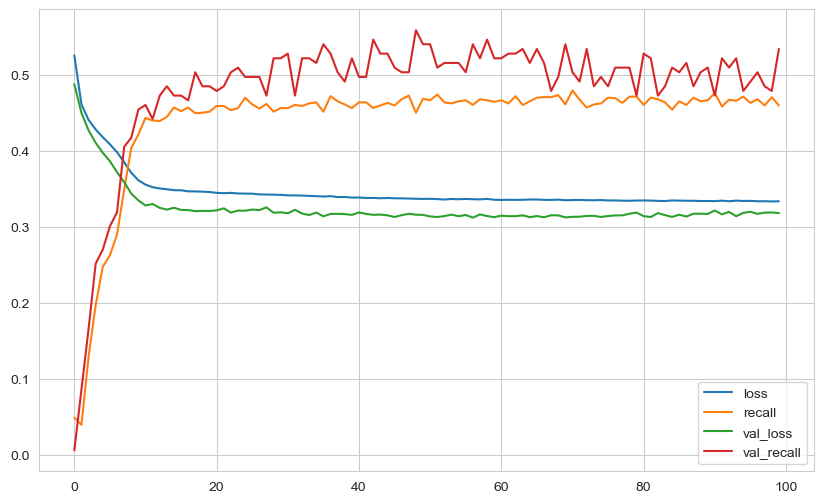

In [52]:
loss_df.plot()

(0.0, 1.0)

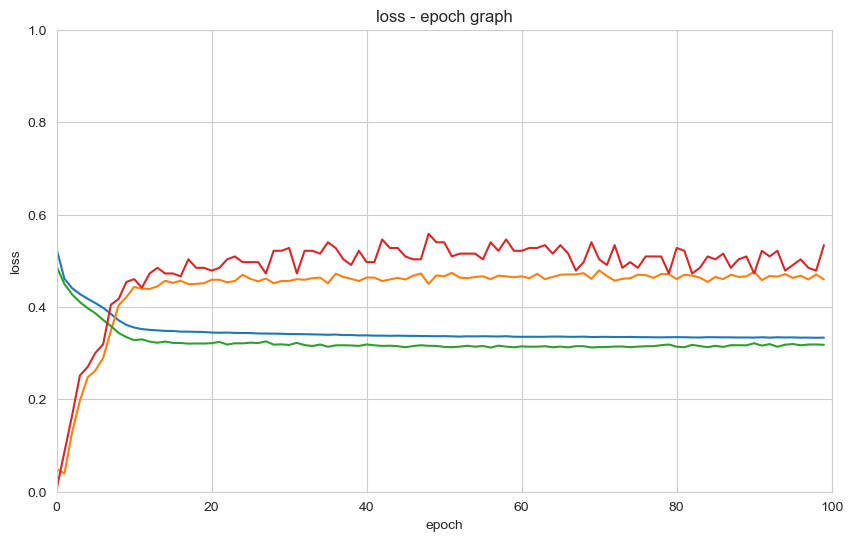

In [53]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 100])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

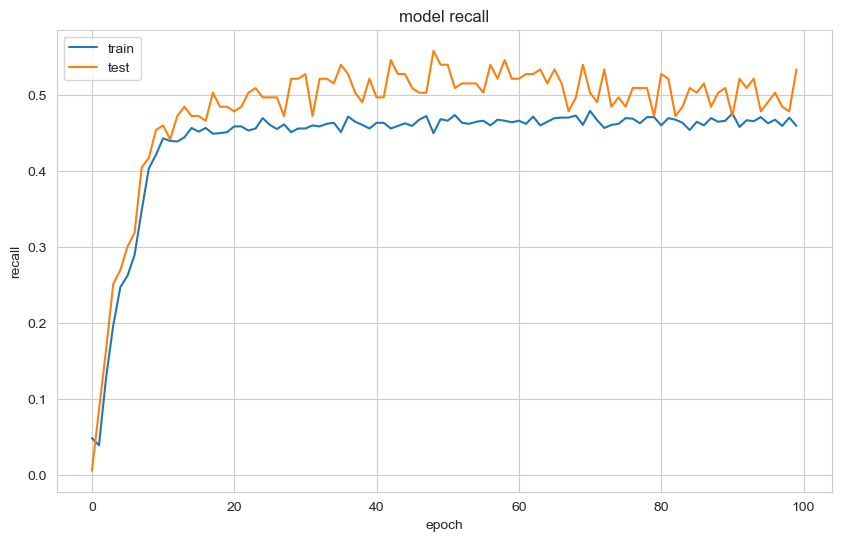

In [54]:
# summarize history for recall
plt.plot(loss_df['recall'])
plt.plot(loss_df['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

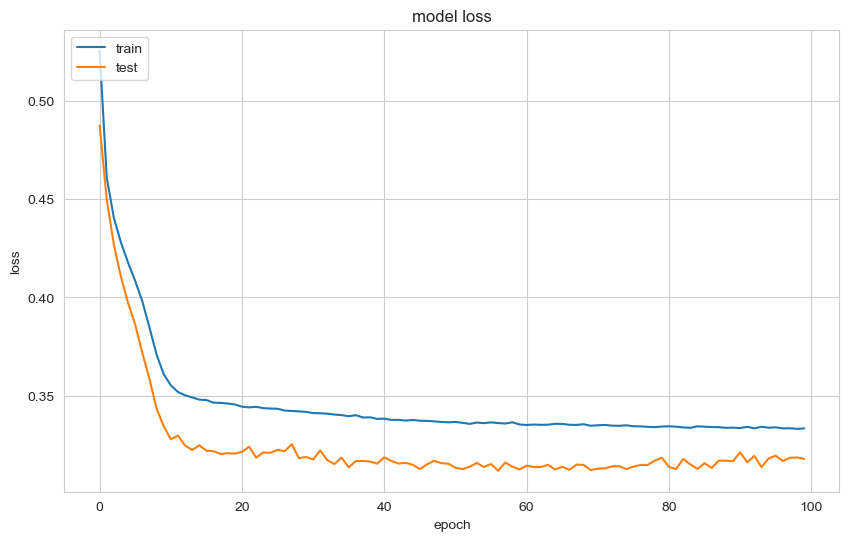

In [55]:
# summarize history for loss
plt.plot(loss_df['loss'])
plt.plot(loss_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
loss_w_c, recall_w_c  = model.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_w_c)
print("recall: ", recall_w_c)

loss:  0.3179857134819031
recall:  0.5337423086166382


In [57]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score

def eval_metric(model, X_train_scale, y_train, X_val_scale, y_val):
    y_train_pred = (model.predict(X_train_scale) > 0.5).astype("int32")
    y_pred = (model.predict(X_val_scale) > 0.5).astype("int32")
    print("Test_Set")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [58]:
eval_metric(model, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 276us/step
Test_Set
[[613  24]
 [ 76  87]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       637
           1       0.78      0.53      0.64       163

    accuracy                           0.88       800
   macro avg       0.84      0.75      0.78       800
weighted avg       0.87      0.88      0.87       800


Train_Set
[[5466  267]
 [ 742  725]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5733
           1       0.73      0.49      0.59      1467

    accuracy                           0.86      7200
   macro avg       0.81      0.72      0.75      7200
weighted avg       0.85      0.86      0.85      7200



In [59]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


def plot_roc_curve(y_true, y_pred_proba, title='ROC Curve'):

  # Calculate the false positive rate (FPR) and true positive rate (TPR).
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

  # Calculate the AUC score.
  auc = roc_auc_score(y_true, y_pred_proba)

  # Plot the ROC curve.
  plt.plot(fpr, tpr, label='ROC curve (AUC = {})'.format(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend()
  plt.show()

63/63 [==============================] - 0s 321us/step


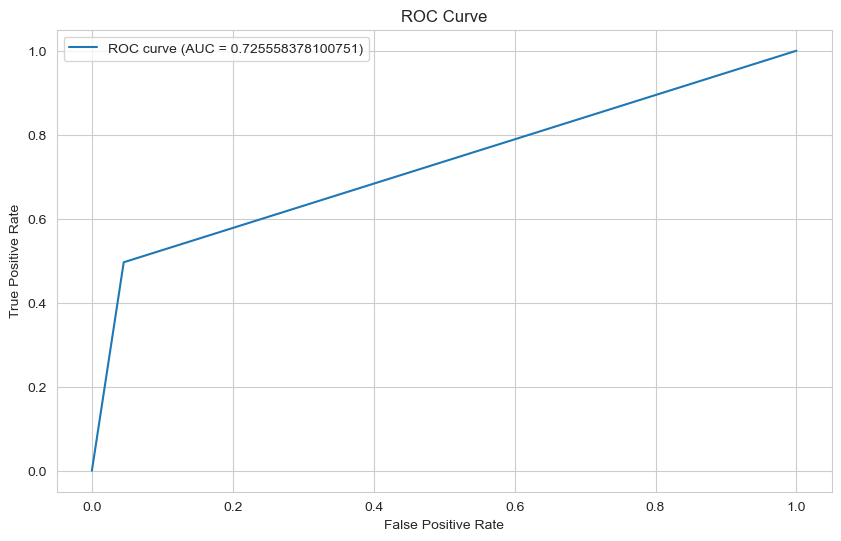

In [60]:
y_pred = (model.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [61]:
# Calculate the AUC score.
auc_w_c = roc_auc_score(y_test, y_pred)

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate the precision, recall, and F1 score for each model
precision_1 = precision_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_score_1 = f1_score(y_test, y_pred)
accuracy_w_c = accuracy_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [63]:
# create the model using the Sequential API
tf.random.set_seed(42)

model2 = Sequential(
    [
        Input(shape=X_train_scale.shape[1]),
        Dense(units=6, activation="relu"),
        Dense(units=6, activation="relu"),
#         Dense(units=6, activation="relu"),
        Dense(units=1, activation='sigmoid'),
    ]
)

In [64]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [65]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [66]:
# Compile and train the model with class weights
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model2.fit(x=X_train_scale, y=y_train, batch_size=16, epochs=100, verbose=1,class_weight=class_weight , validation_data=(X_val_scale, y_val))

Epoch 1/100
450/450 [==============================] - 0s 567us/step - loss: 0.6936 - recall: 0.5242 - val_loss: 0.6795 - val_recall: 0.6442
Epoch 2/100
450/450 [==============================] - 0s 456us/step - loss: 0.6307 - recall: 0.6524 - val_loss: 0.6037 - val_recall: 0.7178
Epoch 3/100
450/450 [==============================] - 0s 453us/step - loss: 0.5837 - recall: 0.6789 - val_loss: 0.5588 - val_recall: 0.7607
Epoch 4/100
450/450 [==============================] - 0s 451us/step - loss: 0.5548 - recall: 0.7014 - val_loss: 0.5267 - val_recall: 0.7669
Epoch 5/100
450/450 [==============================] - 0s 449us/step - loss: 0.5357 - recall: 0.7273 - val_loss: 0.5042 - val_recall: 0.7730
Epoch 6/100
450/450 [==============================] - 0s 448us/step - loss: 0.5207 - recall: 0.7321 - val_loss: 0.4693 - val_recall: 0.7423
Epoch 7/100
450/450 [==============================] - 0s 447us/step - loss: 0.5070 - recall: 0.7478 - val_loss: 0.4483 - val_recall: 0.7055
Epoch 8/100
4

In [67]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 84        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [68]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.694,0.524,0.679,0.644
1,0.631,0.652,0.604,0.718
2,0.584,0.679,0.559,0.761
3,0.555,0.701,0.527,0.767
4,0.536,0.727,0.504,0.773


<Axes: >

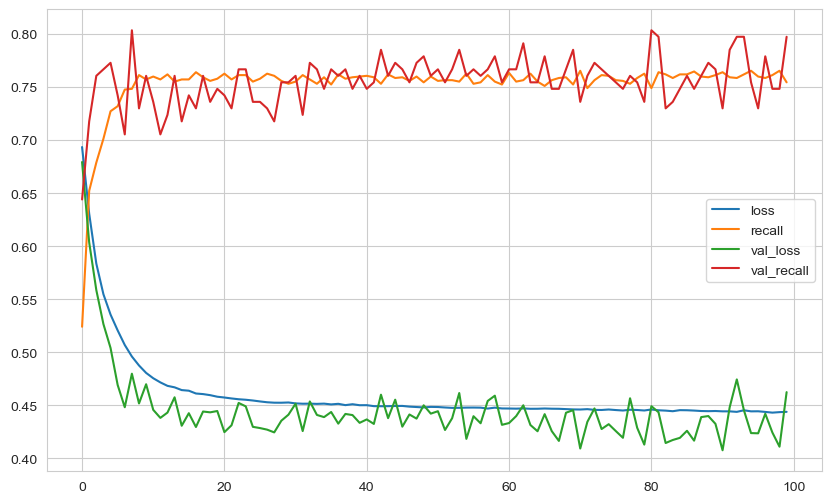

In [69]:
loss_df.plot()

In [70]:
loss_c_w, recall_c_w = model2.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_c_w)
print("recall: ", recall_c_w)

loss:  0.4625285863876343
recall:  0.7975460290908813


In [71]:
eval_metric(model2, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 283us/step
Test_Set
[[510 127]
 [ 33 130]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       637
           1       0.51      0.80      0.62       163

    accuracy                           0.80       800
   macro avg       0.72      0.80      0.74       800
weighted avg       0.85      0.80      0.81       800


Train_Set
[[4492 1241]
 [ 301 1166]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5733
           1       0.48      0.79      0.60      1467

    accuracy                           0.79      7200
   macro avg       0.71      0.79      0.73      7200
weighted avg       0.84      0.79      0.80      7200



63/63 [==============================] - 0s 312us/step


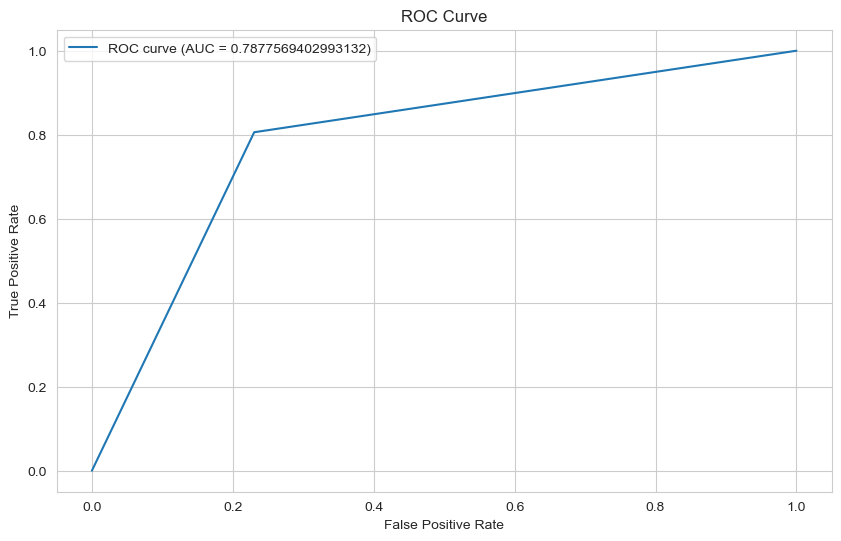

In [72]:
y_pred = (model2.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [73]:
# Calculate the AUC score.
auc_c_w = roc_auc_score(y_test, y_pred)

In [74]:
# Calculate the precision, recall, and F1 score for each model
precision_2 = precision_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred)
f1_score_2 = f1_score(y_test, y_pred)
accuracy_c_w = accuracy_score(y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [75]:
from tensorflow.keras.optimizers import Adam

In [76]:
# create the model using the Sequential API
tf.random.set_seed(42)

modell = Sequential(
    [
        Input(shape=X_train_scale.shape[1]),
        Dense(units=6, activation="relu"),
        Dense(units=6, activation="relu"),
#         Dense(units=6, activation="relu"),
        Dense(units=1, activation='sigmoid'),
    ]
)

In [77]:
# Compile and train the model with class weights and increase learning rate
opt = Adam(learning_rate=0.01)
# opt = Adam(learning_rate=0.005)
modell.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
modell.fit(x=X_train_scale, y=y_train, batch_size=16, epochs=100, verbose=1,class_weight=class_weight, validation_data=(X_val_scale, y_val))

Epoch 1/100
450/450 [==============================] - 0s 557us/step - loss: 0.5910 - recall: 0.7082 - val_loss: 0.5407 - val_recall: 0.7485
Epoch 2/100
450/450 [==============================] - 0s 440us/step - loss: 0.5111 - recall: 0.7444 - val_loss: 0.4070 - val_recall: 0.7546
Epoch 3/100
450/450 [==============================] - 0s 435us/step - loss: 0.4856 - recall: 0.7335 - val_loss: 0.4709 - val_recall: 0.7791
Epoch 4/100
450/450 [==============================] - 0s 435us/step - loss: 0.4763 - recall: 0.7294 - val_loss: 0.5420 - val_recall: 0.8589
Epoch 5/100
450/450 [==============================] - 0s 474us/step - loss: 0.4718 - recall: 0.7389 - val_loss: 0.5464 - val_recall: 0.8221
Epoch 6/100
450/450 [==============================] - 0s 439us/step - loss: 0.4749 - recall: 0.7444 - val_loss: 0.4613 - val_recall: 0.7178
Epoch 7/100
450/450 [==============================] - 0s 432us/step - loss: 0.4710 - recall: 0.7423 - val_loss: 0.4231 - val_recall: 0.7669
Epoch 8/100
4

<Axes: >

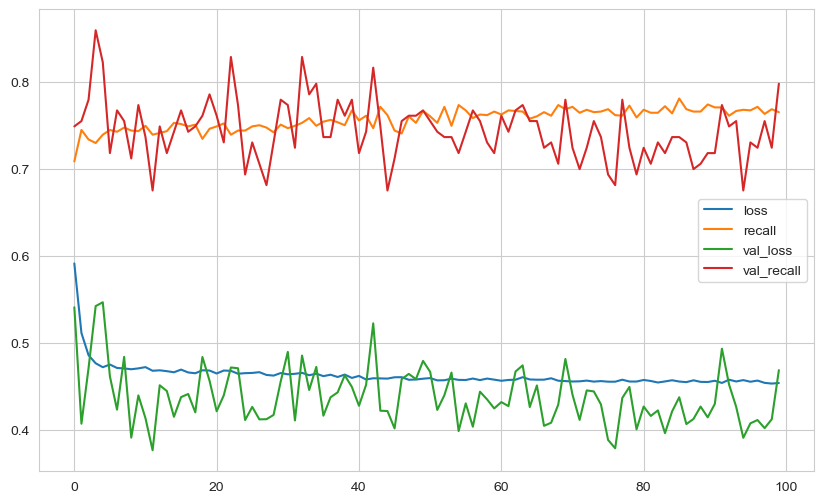

In [78]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(modell.history.history)
loss_df.plot()

In [79]:
loss_l_r, recall_l_r = modell.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_l_r)
print("recall: ", recall_l_r)

loss:  0.4684610664844513
recall:  0.7975460290908813


In [80]:
eval_metric(modell, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 290us/step
Test_Set
[[477 160]
 [ 33 130]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       637
           1       0.45      0.80      0.57       163

    accuracy                           0.76       800
   macro avg       0.69      0.77      0.70       800
weighted avg       0.84      0.76      0.78       800


Train_Set
[[4251 1482]
 [ 250 1217]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      5733
           1       0.45      0.83      0.58      1467

    accuracy                           0.76      7200
   macro avg       0.70      0.79      0.71      7200
weighted avg       0.84      0.76      0.78      7200



63/63 [==============================] - 0s 336us/step


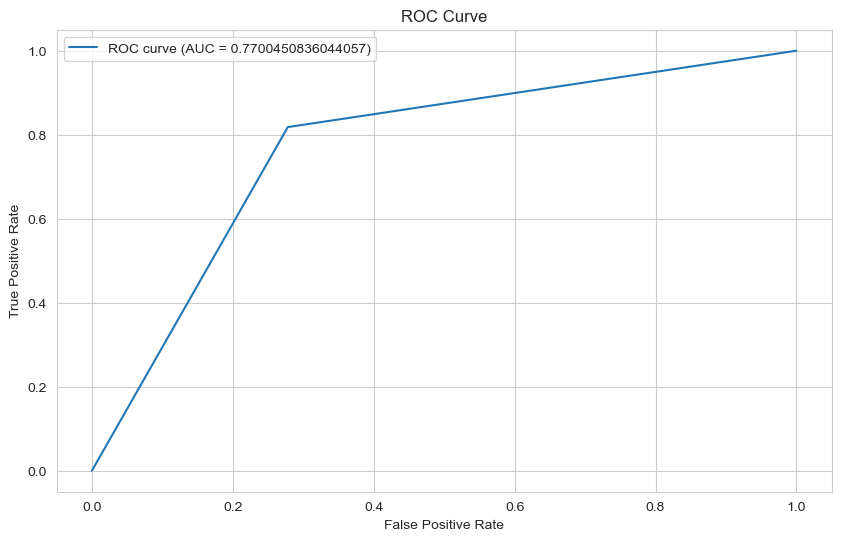

In [81]:
y_pred = (modell.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [82]:
# Calculate the AUC score.
auc_l_r = roc_auc_score(y_test, y_pred)

In [83]:
# Calculate the precision, recall, and F1 score for each model
precision_3= precision_score(y_test, y_pred)
recall_3 = recall_score(y_test, y_pred)
f1_score_3 = f1_score(y_test, y_pred)
accuracy_l_r = accuracy_score(y_test, y_pred)

### Add Dropout Layer

In [84]:
from tensorflow.keras.layers import Dropout

In [85]:
# create the model using the Sequential API
tf.random.set_seed(42)

modeld = Sequential(
    [
        Input(shape=X_train_scale.shape[1]),
        Dense(units=6, activation="relu"),
        Dropout(rate = 0.1),
        Dense(units=6, activation="relu"),
        Dropout(rate = 0.1),
#         Dense(units=6, activation="relu"),
        Dense(units=1, activation='sigmoid'),
    ]
)

In [86]:
# Compile and train the model with class weights
modeld.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
modeld.fit(x=X_train_scale, y=y_train, batch_size=16, epochs=100, verbose=1,class_weight=class_weight, validation_data=(X_val_scale, y_val))

Epoch 1/100
450/450 [==============================] - 0s 582us/step - loss: 0.6757 - recall: 0.5487 - val_loss: 0.6304 - val_recall: 0.6810
Epoch 2/100
450/450 [==============================] - 0s 467us/step - loss: 0.6276 - recall: 0.6667 - val_loss: 0.5739 - val_recall: 0.6748
Epoch 3/100
450/450 [==============================] - 0s 460us/step - loss: 0.6081 - recall: 0.6796 - val_loss: 0.5562 - val_recall: 0.6994
Epoch 4/100
450/450 [==============================] - 0s 457us/step - loss: 0.5983 - recall: 0.6987 - val_loss: 0.5426 - val_recall: 0.6994
Epoch 5/100
450/450 [==============================] - 0s 463us/step - loss: 0.5935 - recall: 0.7164 - val_loss: 0.5451 - val_recall: 0.7117
Epoch 6/100
450/450 [==============================] - 0s 462us/step - loss: 0.5902 - recall: 0.7117 - val_loss: 0.5411 - val_recall: 0.7055
Epoch 7/100
450/450 [==============================] - 0s 457us/step - loss: 0.5862 - recall: 0.7117 - val_loss: 0.5323 - val_recall: 0.7117
Epoch 8/100
4

<Axes: >

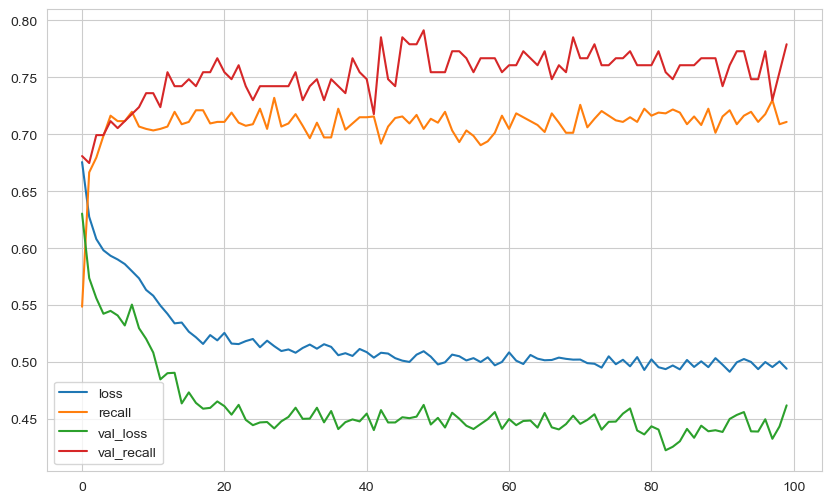

In [87]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(modeld.history.history)
loss_df.plot()

In [88]:
loss_d_l, recall_d_l = modeld.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_d_l)
print("recall: ", recall_d_l)

loss:  0.4621284604072571
recall:  0.7791411280632019


In [89]:
eval_metric(modeld, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 278us/step
Test_Set
[[506 131]
 [ 36 127]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       637
           1       0.49      0.78      0.60       163

    accuracy                           0.79       800
   macro avg       0.71      0.79      0.73       800
weighted avg       0.84      0.79      0.81       800


Train_Set
[[4500 1233]
 [ 321 1146]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      5733
           1       0.48      0.78      0.60      1467

    accuracy                           0.78      7200
   macro avg       0.71      0.78      0.72      7200
weighted avg       0.84      0.78      0.80      7200



63/63 [==============================] - 0s 500us/step


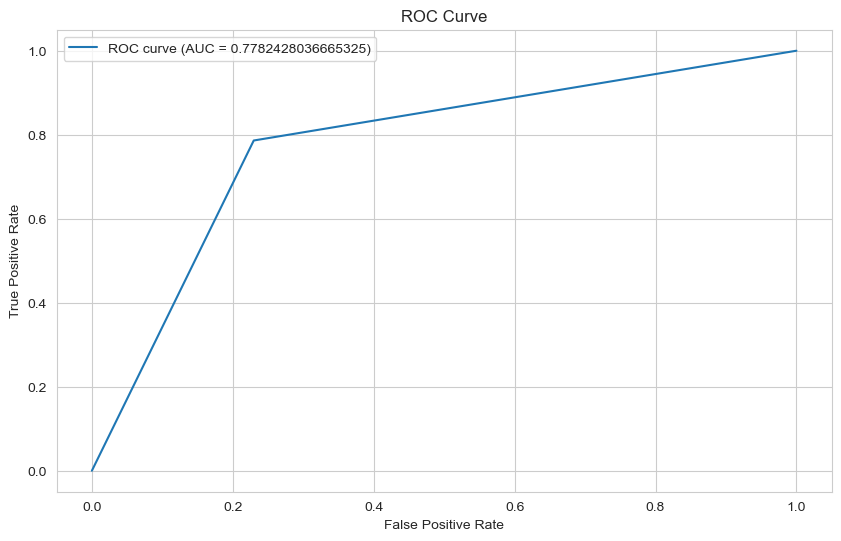

In [90]:
y_pred = (modeld.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [91]:
# Calculate the AUC score.
auc_d_l = roc_auc_score(y_test, y_pred)

In [92]:
# Calculate the precision, recall, and F1 score for each model
precision_4 = precision_score(y_test, y_pred)
recall_4 = recall_score(y_test, y_pred)
f1_score_4 = f1_score(y_test, y_pred)
accuracy_d_l = accuracy_score(y_test, y_pred)

### Add Early Stop

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
# create the model using the Sequential API
tf.random.set_seed(42)

modele = Sequential(
    [
        Input(shape=X_train_scale.shape[1]),
        Dense(units=6, activation="relu"),
        Dense(units=6, activation="relu"),
#         Dense(units=6, activation="relu"),
        Dense(units=1, activation='sigmoid'),
    ]
)

#### Monitor the "val_loss" as metric

In [95]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True)

In [96]:
# Compile and train the model with class weights
modele.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
modele.fit(x=X_train_scale, y=y_train, batch_size=16, epochs=100, verbose=1,class_weight=class_weight,callbacks=[early_stop], validation_data=(X_val_scale, y_val))

Epoch 1/100
450/450 [==============================] - 0s 584us/step - loss: 0.6855 - recall: 0.4813 - val_loss: 0.6673 - val_recall: 0.5153
Epoch 2/100
450/450 [==============================] - 0s 449us/step - loss: 0.6360 - recall: 0.5712 - val_loss: 0.6180 - val_recall: 0.6074
Epoch 3/100
450/450 [==============================] - 0s 446us/step - loss: 0.6082 - recall: 0.6237 - val_loss: 0.5942 - val_recall: 0.6687
Epoch 4/100
450/450 [==============================] - 0s 455us/step - loss: 0.5952 - recall: 0.6571 - val_loss: 0.5692 - val_recall: 0.6687
Epoch 5/100
450/450 [==============================] - 0s 446us/step - loss: 0.5874 - recall: 0.6878 - val_loss: 0.5641 - val_recall: 0.6933
Epoch 6/100
450/450 [==============================] - 0s 488us/step - loss: 0.5807 - recall: 0.6953 - val_loss: 0.5353 - val_recall: 0.6810
Epoch 7/100
450/450 [==============================] - 0s 443us/step - loss: 0.5750 - recall: 0.7062 - val_loss: 0.5223 - val_recall: 0.6810
Epoch 8/100
4

<Axes: >

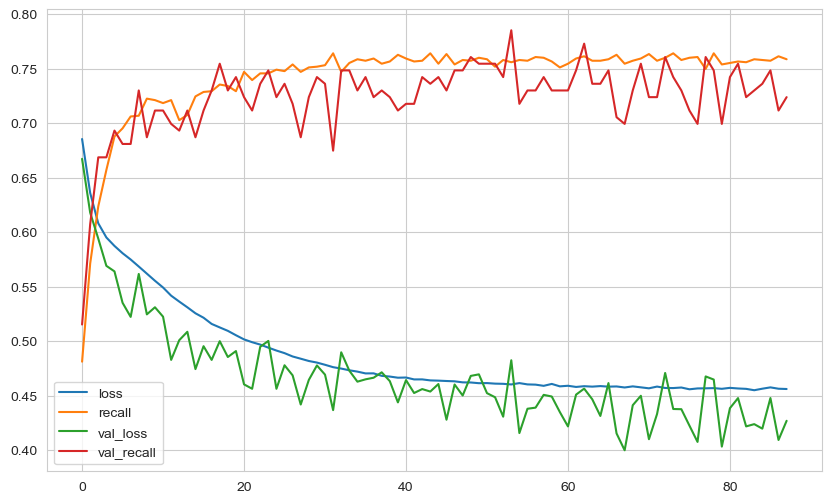

In [97]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(modele.history.history)
loss_df.plot()

In [98]:
loss_e_s, recall_e_s = modele.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_e_s)
print("recall: ", recall_e_s)

loss:  0.399948388338089
recall:  0.699386477470398


In [99]:
eval_metric(modele, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 284us/step
Test_Set
[[537 100]
 [ 49 114]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       637
           1       0.53      0.70      0.60       163

    accuracy                           0.81       800
   macro avg       0.72      0.77      0.74       800
weighted avg       0.84      0.81      0.82       800


Train_Set
[[4861  872]
 [ 431 1036]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      5733
           1       0.54      0.71      0.61      1467

    accuracy                           0.82      7200
   macro avg       0.73      0.78      0.75      7200
weighted avg       0.84      0.82      0.83      7200



63/63 [==============================] - 0s 304us/step


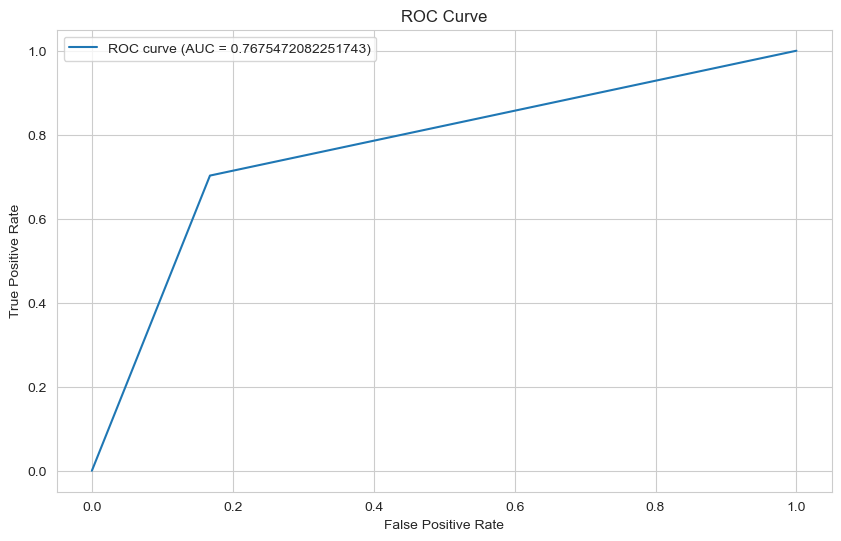

In [100]:
y_pred = (modele.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [101]:
# Calculate the AUC score.
auc_e_s = roc_auc_score(y_test, y_pred)

In [102]:
# Calculate the precision, recall, and F1 score for each model
precision_5 = precision_score(y_test, y_pred)
recall_5 = recall_score(y_test, y_pred)
f1_score_5 = f1_score(y_test, y_pred)
accuracy_e_s = accuracy_score(y_test, y_pred)

#### Monitor the "val_recall" as metric

In [103]:
early_stoping = EarlyStopping(monitor="val_recall", mode="min", verbose=1, patience=20, restore_best_weights=True)

In [104]:
# Compile and train the model with class weights
modele.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
modele.fit(x=X_train_scale, y=y_train, batch_size=16, epochs=100, verbose=1,class_weight=class_weight,callbacks=[early_stoping], validation_data=(X_val_scale, y_val))

Epoch 1/100
450/450 [==============================] - 0s 568us/step - loss: 0.4581 - recall: 0.7580 - val_loss: 0.4623 - val_recall: 0.7423
Epoch 2/100
450/450 [==============================] - 0s 453us/step - loss: 0.4577 - recall: 0.7580 - val_loss: 0.4123 - val_recall: 0.7423
Epoch 3/100
450/450 [==============================] - 0s 445us/step - loss: 0.4572 - recall: 0.7614 - val_loss: 0.4744 - val_recall: 0.7730
Epoch 4/100
450/450 [==============================] - 0s 447us/step - loss: 0.4580 - recall: 0.7566 - val_loss: 0.4428 - val_recall: 0.7485
Epoch 5/100
450/450 [==============================] - 0s 445us/step - loss: 0.4572 - recall: 0.7621 - val_loss: 0.4589 - val_recall: 0.7607
Epoch 6/100
450/450 [==============================] - 0s 449us/step - loss: 0.4579 - recall: 0.7566 - val_loss: 0.4146 - val_recall: 0.7239
Epoch 7/100
450/450 [==============================] - 0s 447us/step - loss: 0.4571 - recall: 0.7526 - val_loss: 0.3986 - val_recall: 0.7117
Epoch 8/100
4

<Axes: >

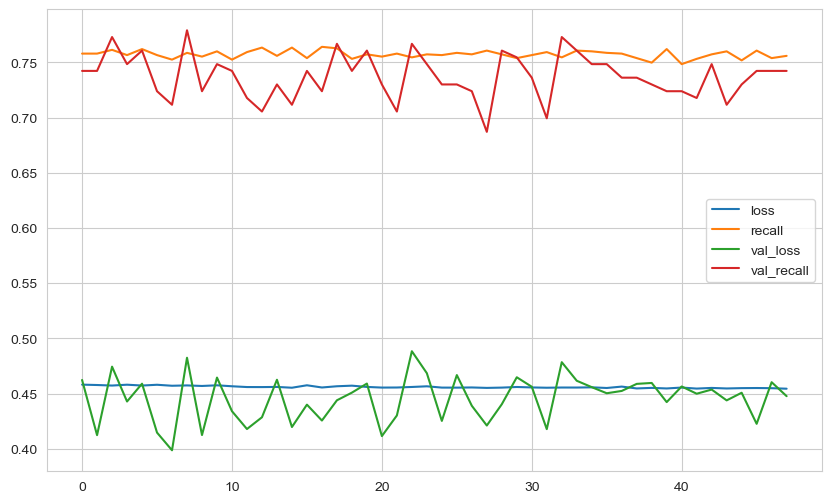

In [105]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(modele.history.history)
loss_df.plot()

In [106]:
loss_e_r, recall_e_r = modele.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_e_r)
print("recall: ", recall_e_r)

loss:  0.4210265278816223
recall:  0.6871165633201599


In [107]:
eval_metric(modele, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 315us/step
Test_Set
[[531 106]
 [ 51 112]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       637
           1       0.51      0.69      0.59       163

    accuracy                           0.80       800
   macro avg       0.71      0.76      0.73       800
weighted avg       0.83      0.80      0.81       800


Train_Set
[[4804  929]
 [ 417 1050]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5733
           1       0.53      0.72      0.61      1467

    accuracy                           0.81      7200
   macro avg       0.73      0.78      0.74      7200
weighted avg       0.84      0.81      0.82      7200



63/63 [==============================] - 0s 310us/step


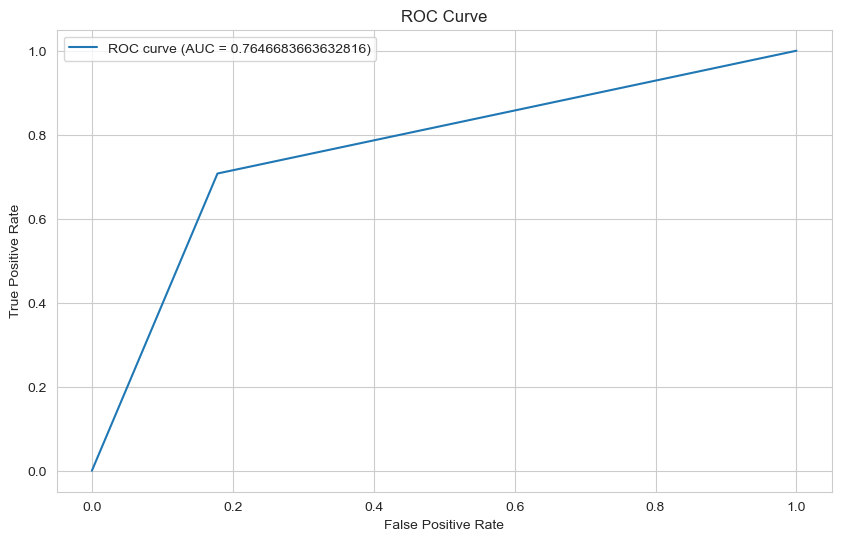

In [108]:
y_pred = (modele.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [109]:
# Calculate the AUC score.
auc_e_r = roc_auc_score(y_test, y_pred)

In [110]:
# Calculate the precision, recall, and F1 score for each model
precision_6 = precision_score(y_test, y_pred)
recall_6 = recall_score(y_test, y_pred)
f1_score_6 = f1_score(y_test, y_pred)
accuracy_e_r = accuracy_score(y_test, y_pred)

## Optuna

In [111]:
import optuna

In [112]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [113]:
trial_metric = "Recall"
batch_size = 16

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from imblearn.over_sampling import SMOTE


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
#     n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
#     dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    
    tf.random.set_seed(42)
    modelo = Sequential(
        [
            Input(shape=X_train_scale.shape[1]),
            Dense(n_units1, activation="relu"),
#             Dropout(dropout_rate),
            Dense(n_units2, activation="relu"),
#             Dropout(dropout_rate),
#             Dense(n_units3, activation="relu"),
            Dense(units=1, activation='sigmoid'),
        ]
    )
    modelo.compile(loss="binary_crossentropy",optimizer=optimizer(learning_rate=learning_rate),metrics=[trial_metric],)
    return model

def objective(trial):
    smote = SMOTE()
    
    X_train_over, y_train_over = smote.fit_resample(X_train_scale, y_train)

    modelo = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    modelo.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val_scale, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = modelo.evaluate(X_val_scale, y_val, verbose=0)[1]
    return score

In [114]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 18:40:00,848] A new study created in memory with name: no-name-e8f24122-f321-4e5b-9b61-ce941c0c0e44


Restoring model weights from the end of the best epoch: 25.
Epoch 40: early stopping


[I 2023-10-30 18:40:12,969] Trial 0 finished with value: 1.0 and parameters: {'n_units1': 59, 'n_units2': 23, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 8.222562600786523e-05, 'w0': 0.023588174160490586, 'w1': 4.382840274731952}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 25.
Epoch 40: early stopping


[I 2023-10-30 18:40:24,970] Trial 1 finished with value: 1.0 and parameters: {'n_units1': 110, 'n_units2': 13, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0025228015872447492, 'w0': 0.06553201992864915, 'w1': 4.593238837084509}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 18:40:33,717] Trial 2 finished with value: 0.6073619723320007 and parameters: {'n_units1': 67, 'n_units2': 53, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005221111067457866, 'w0': 0.14596693387429963, 'w1': 0.07732917793949662}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 18:40:38,638] Trial 3 finished with value: 0.9141104221343994 and parameters: {'n_units1': 33, 'n_units2': 119, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0002898529376345982, 'w0': 0.301339750871021, 'w1': 0.9422071816307197}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 18:40:45,010] Trial 4 finished with value: 0.9938650131225586 and parameters: {'n_units1': 104, 'n_units2': 100, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07382179687575102, 'w0': 0.13919223595010108, 'w1': 3.2356447593486077}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 18:40:55,268] Trial 5 finished with value: 0.9754601120948792 and parameters: {'n_units1': 8, 'n_units2': 71, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0032927948177495395, 'w0': 0.020792249957048793, 'w1': 0.2535849609302677}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 44.
Epoch 59: early stopping


[I 2023-10-30 18:41:12,946] Trial 6 finished with value: 1.0 and parameters: {'n_units1': 122, 'n_units2': 56, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.006667381310660126, 'w0': 0.010379113540781153, 'w1': 3.4071047027849777}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 37.
Epoch 52: early stopping


[I 2023-10-30 18:41:28,461] Trial 7 finished with value: 0.9263803958892822 and parameters: {'n_units1': 53, 'n_units2': 54, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0007853525645981925, 'w0': 0.0317503502859003, 'w1': 0.17149696641624065}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 18:41:33,672] Trial 8 finished with value: 0.48466256260871887 and parameters: {'n_units1': 46, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.8893996726124496e-05, 'w0': 0.3222112672382014, 'w1': 0.06591195766617874}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 18:41:41,604] Trial 9 finished with value: 0.9938650131225586 and parameters: {'n_units1': 87, 'n_units2': 96, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00020416048143408048, 'w0': 0.010050090998171215, 'w1': 2.8218562112731425}. Best is trial 0 with value: 1.0.


{'n_units1': 59,
 'n_units2': 23,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 8.222562600786523e-05,
 'w0': 0.023588174160490586,
 'w1': 4.382840274731952}

In [115]:
# build model with optuna parameters
unit1, unit2,optimizer, lr, w0, w1= (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
#     study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
#     study.best_params["dropout_rate"]
)

smote = SMOTE()
    
X_train_over, y_train_over = smote.fit_resample(X_train_scale, y_train)

# Create a Sequential model.
tf.random.set_seed(42)

modelo = Sequential(
    [
        Input(shape=X_train_scale.shape[1]),
        Dense(unit1, activation="relu"),
#         Dropout(dr),
        Dense(unit2, activation="relu"),
#         Dropout(dr),
#         Dense(unit3, activation="relu"),
        Dense(units=1, activation='sigmoid'),
    ]
)

opt = optimizer(learning_rate=lr)

# Compile the model.
modelo.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

# train model
modelo.fit(
    X_train_over,
    y_train_over,
#     validation_split=0.15,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
#     class_weight={0: w0, 1: w1},
    verbose=1,
    validation_data=(X_val_scale, y_val)

)

Epoch 1/100
717/717 [==============================] - 0s 475us/step - loss: 0.6530 - recall: 0.7903 - val_loss: 0.6218 - val_recall: 0.7178
Epoch 2/100
717/717 [==============================] - 0s 397us/step - loss: 0.5926 - recall: 0.7281 - val_loss: 0.5694 - val_recall: 0.6994
Epoch 3/100
717/717 [==============================] - 0s 404us/step - loss: 0.5659 - recall: 0.7331 - val_loss: 0.5341 - val_recall: 0.6933
Epoch 4/100
717/717 [==============================] - 0s 397us/step - loss: 0.5488 - recall: 0.7342 - val_loss: 0.5195 - val_recall: 0.7362
Epoch 5/100
717/717 [==============================] - 0s 395us/step - loss: 0.5345 - recall: 0.7469 - val_loss: 0.5074 - val_recall: 0.7301
Epoch 6/100
717/717 [==============================] - 0s 396us/step - loss: 0.5212 - recall: 0.7537 - val_loss: 0.4953 - val_recall: 0.7485
Epoch 7/100
717/717 [==============================] - 0s 400us/step - loss: 0.5090 - recall: 0.7642 - val_loss: 0.4773 - val_recall: 0.7485
Epoch 8/100
7

In [116]:
modelo.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 59)                826       
                                                                 
 dense_46 (Dense)            (None, 23)                1380      
                                                                 
 dense_47 (Dense)            (None, 1)                 24        
                                                                 
Total params: 2230 (8.71 KB)
Trainable params: 2230 (8.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

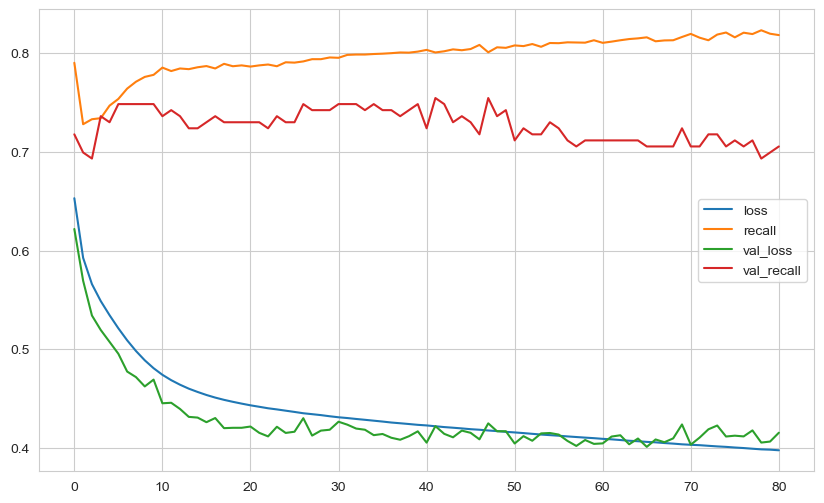

In [117]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(modelo.history.history)
loss_df.plot()

In [118]:
loss_o_p, recall_o_p = modelo.evaluate(X_val_scale, y_val, verbose=0)
print("loss: ", loss_o_p)
print("recall: ", recall_o_p)

loss:  0.4009712338447571
recall:  0.7055214643478394


In [119]:
eval_metric(modelo, X_train_scale, y_train, X_val_scale, y_val)

25/25 [==============================] - 0s 296us/step
Test_Set
[[533 104]
 [ 48 115]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       637
           1       0.53      0.71      0.60       163

    accuracy                           0.81       800
   macro avg       0.72      0.77      0.74       800
weighted avg       0.84      0.81      0.82       800


Train_Set
[[4730 1003]
 [ 352 1115]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      5733
           1       0.53      0.76      0.62      1467

    accuracy                           0.81      7200
   macro avg       0.73      0.79      0.75      7200
weighted avg       0.85      0.81      0.82      7200



63/63 [==============================] - 0s 324us/step


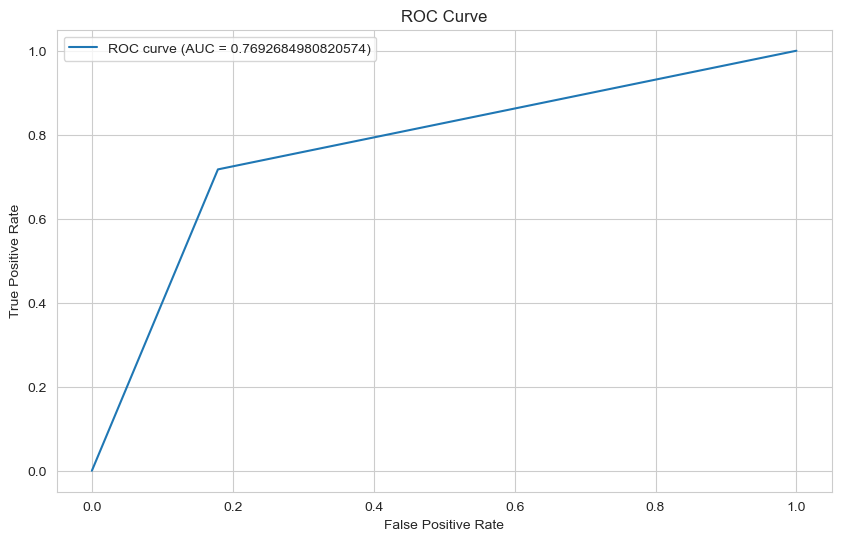

In [120]:
y_pred = (modelo.predict(X_test_scale) > 0.5).astype("int32")

plot_roc_curve(y_test, y_pred)

In [121]:
# Calculate the AUC score.
auc_o_p = roc_auc_score(y_test, y_pred)

In [122]:
# Calculate the precision, recall, and F1 score for each model
precision_7 = precision_score(y_test, y_pred)
recall_7 = recall_score(y_test, y_pred)
f1_score_7 = f1_score(y_test, y_pred)
accuracy_o_p = accuracy_score(y_test, y_pred)

# Final Model and Model Deployment

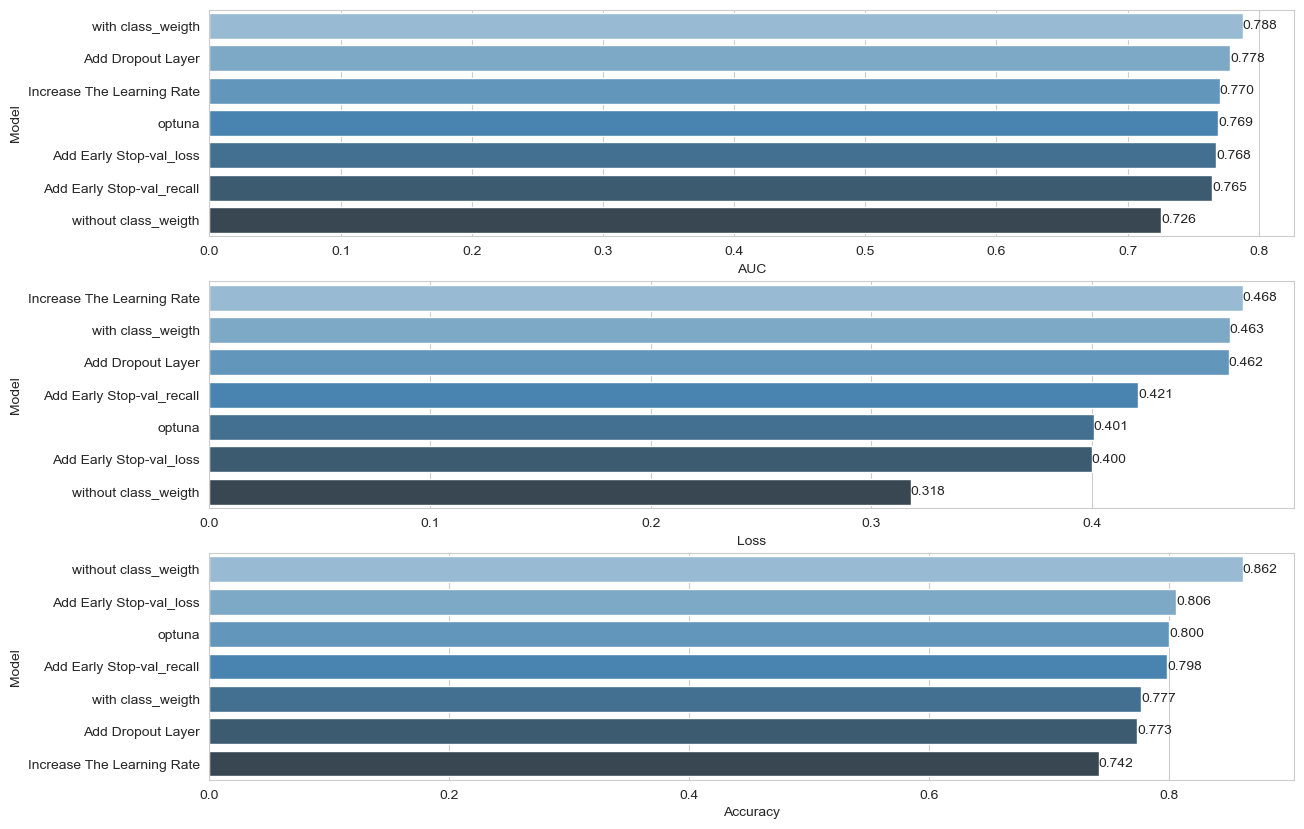

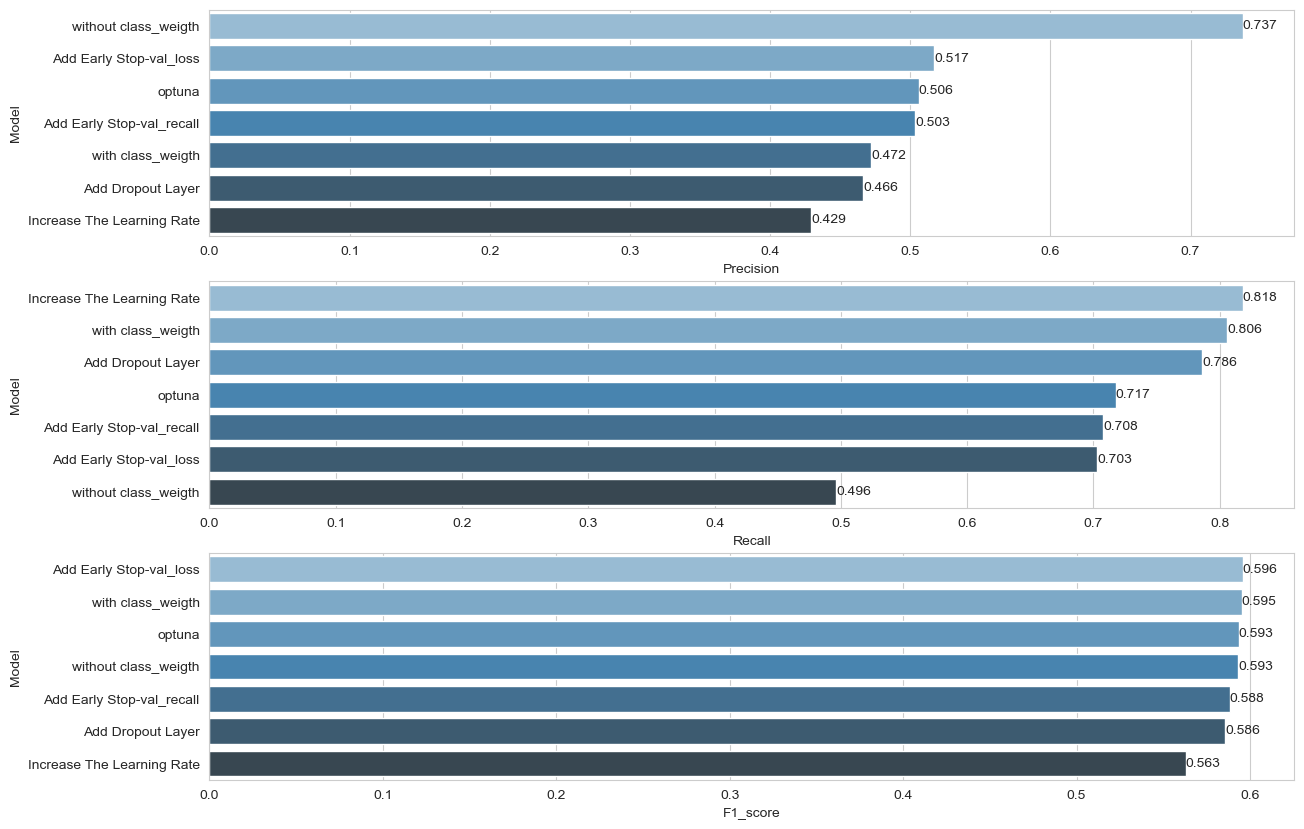

In [123]:
compare = pd.DataFrame(
    {
        "Model": ["without class_weigth", "with class_weigth", "Increase The Learning Rate", "Add Dropout Layer",
                 "Add Early Stop-val_loss" , "Add Early Stop-val_recall","optuna"],
        "AUC": [auc_w_c, auc_c_w, auc_l_r, auc_d_l,auc_e_s,auc_e_r,auc_o_p],
        "Loss" : [loss_w_c, loss_c_w, loss_l_r, loss_d_l,loss_e_s,loss_e_r,loss_o_p],
        "Accuracy": [accuracy_w_c, accuracy_c_w, accuracy_l_r, accuracy_d_l,accuracy_e_s,accuracy_e_r,accuracy_o_p],
        "Precision": [precision_1, precision_2, precision_3, precision_4,precision_5,precision_6,precision_7],
        "Recall" : [recall_1, recall_2, recall_3, recall_4,recall_5,recall_6,recall_7],
        "F1_score": [f1_score_1, f1_score_2, f1_score_3, f1_score_4,f1_score_5,f1_score_6,f1_score_7],
    }
)
   
plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="AUC", ascending=False)
ax = sns.barplot(x="AUC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Loss", ascending=False)
ax = sns.barplot(x="Loss", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax = sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="F1_score", ascending=False)
ax = sns.barplot(x="F1_score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

In [124]:
Model = ["without class_weigth", "with class_weigth", "Increase The Learning Rate", "Add Dropout Layer",
                 "Add Early Stop-val_loss" , "Add Early Stop-val_recall","optuna"]
Recall = [recall_1, recall_2, recall_3, recall_4,recall_5,recall_6,recall_7]

com = {
    "Model": Model,
    "Recall": Recall,
}
compare_recall = pd.DataFrame(com)
compare_recall = compare_recall.sort_values(by='Recall')
compare_recall

,Model,Recall
0,without class_weigth,0.496
4,Add Early Stop-val_loss,0.703
5,Add Early Stop-val_recall,0.708
6,optuna,0.717
3,Add Dropout Layer,0.786
1,with class_weigth,0.806
2,Increase The Learning Rate,0.818


<BarContainer object of 7 artists>

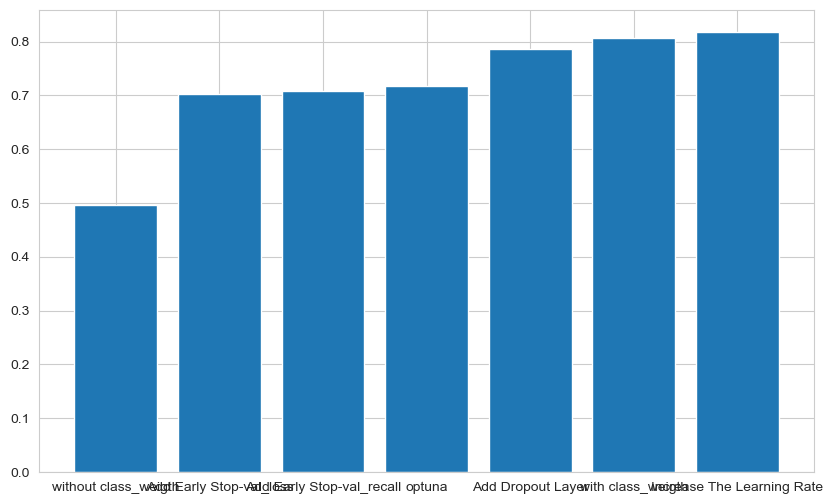

In [126]:
plt.bar(compare_recall['Model'], compare_recall['Recall'])

In [127]:
import pickle

pickle.dump(sc, open("scaler_exited", "wb"))

In [128]:
loss, recall = modell.evaluate(X_test_scale, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5015822052955627
recall:  0.8181818127632141


In [129]:
y_pred = modell.predict(X_test_scale) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 367us/step
[[1150  443]
 [  74  333]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1593
           1       0.43      0.82      0.56       407

    accuracy                           0.74      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.84      0.74      0.76      2000



In [130]:
modell.save("model_exited.h5")

## Prediction

In [131]:
from tensorflow.keras.models import load_model

In [132]:
model_exited = load_model("model_exited.h5")
scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [133]:
single_patient = df.drop("Exited", axis=1).iloc[0:1, :]
single_patient

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1.000,0.000,0.000,1.000,0.000


In [134]:
single_patient = scaler_exited.transform(single_patient)
single_patient

array([[-0.33125951,  0.28324505, -1.04299326, -1.23468294, -0.90615368,
         0.64082627,  0.96881921,  0.02973009,  1.00083368, -0.57948861,
        -0.57585343,  1.10647266, -1.10647266]])

In [135]:
(model_exited.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 18ms/step


array([[1]], dtype=int32)

In [136]:
df["Exited"].iloc[0]

1

In [137]:
# X_train_scale_df = pd.DataFrame(X_train_over)

# final_model.predict(X_train_scale_df.loc[[100]])

In [138]:
# y_train[100]

In [139]:
from sklearn.metrics import matthews_corrcoef

y_pred = (model_exited.predict(X_test_scale) > 0.5).astype("int32")

matthews_corrcoef(y_test, y_pred)

63/63 [==============================] - 0s 298us/step


0.44622078268718973

In [140]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.40380641352079405

In [141]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(-1,),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
6652,0,0
3601,1,1
6593,0,0
7706,0,0
435,0,1
4669,1,1
1075,0,0
9340,0,0
2568,1,1
4998,0,0


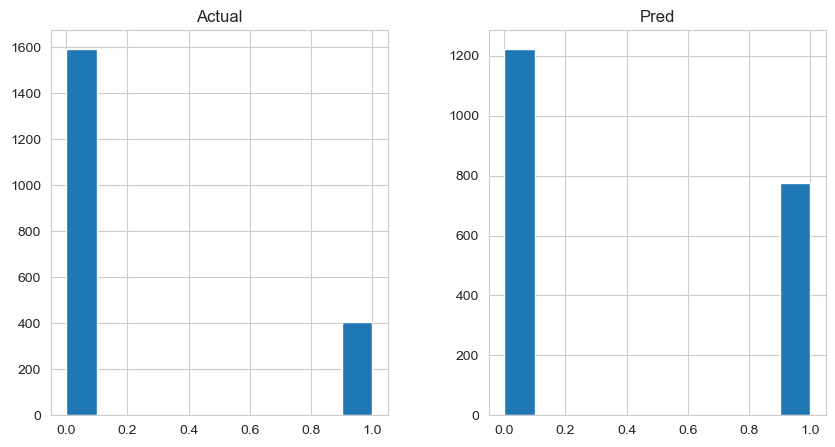

In [142]:
compare.hist(figsize=(10,5))

plt.show()

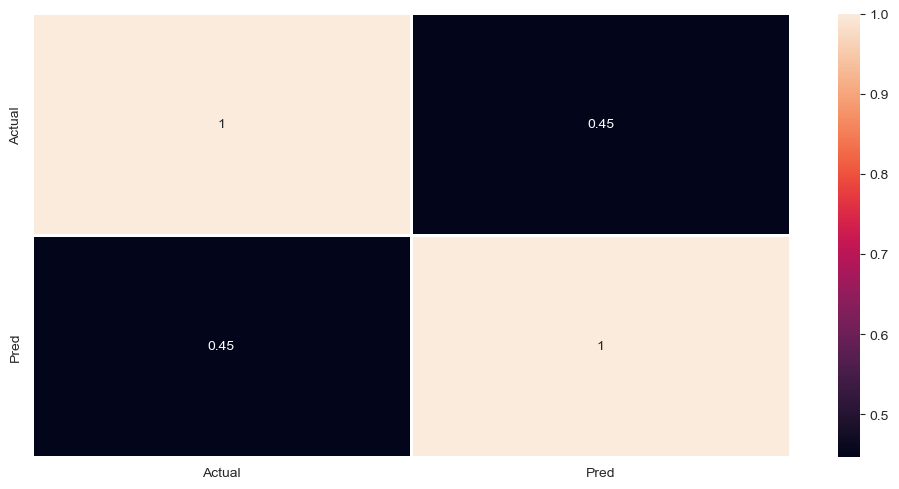

In [143]:
plt.figure(figsize=(10,5))
sns.heatmap(compare.corr(numeric_only=True),annot=True,linewidth =2 )
plt.tight_layout()

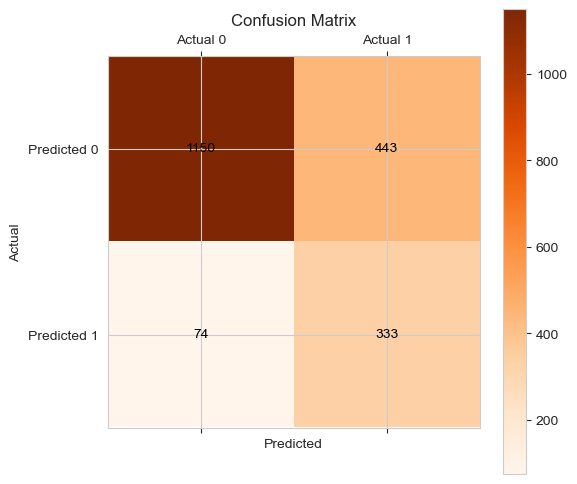

In [144]:
# Extract the actual and predicted values from the DataFrame
actual = compare['Actual']
predicted = compare['Pred']

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(actual, predicted)

# Plot the confusion matrix
plt.matshow(confusion_matrix, cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()

# Add labels to the axes
plt.xticks([0, 1], ['Actual 0', 'Actual 1'])
plt.yticks([0, 1], ['Predicted 0', 'Predicted 1'])

# Display the values of the confusion matrix in the plot
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black')

# # Increase the size of the plot and the font size of the text
# plt.figure(figsize=(10, 10))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

plt.show()


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___